In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [4]:
import matplotlib.pyplot as plt
def plot_image(image,i):
    fig = plt.gcf()
    fig.set_size_inches(3, 3)
    plt.imshow(image, cmap='binary')
    plt.title("Class {}".format(y_train[i]))
    plt.show()

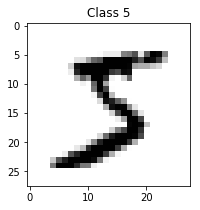

In [5]:
plot_image(X_train[0],0)


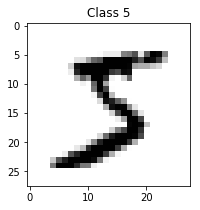

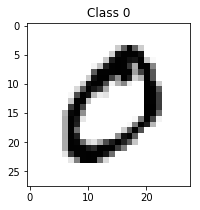

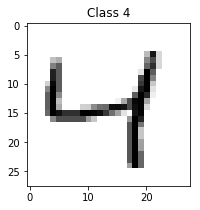

In [6]:
for i in range(3):
    plot_image(X_train[i],i)

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("訓練矩陣維度 shape", X_train.shape)
print("測試矩陣維度 shape", X_test.shape)

訓練矩陣維度 shape (60000, 784)
測試矩陣維度 shape (10000, 784)


In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
y_train[0]

5

In [10]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))   
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
train_data=model.fit(X_train, Y_train,
          validation_split=0.2, epochs=8,
          batch_size=128, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
 - 13s - loss: 0.2898 - acc: 0.9123 - val_loss: 0.1267 - val_acc: 0.9603
Epoch 2/8
 - 12s - loss: 0.1165 - acc: 0.9643 - val_loss: 0.1006 - val_acc: 0.9708
Epoch 3/8
 - 12s - loss: 0.0844 - acc: 0.9734 - val_loss: 0.0935 - val_acc: 0.9718
Epoch 4/8
 - 12s - loss: 0.0663 - acc: 0.9789 - val_loss: 0.0879 - val_acc: 0.9746
Epoch 5/8
 - 12s - loss: 0.0579 - acc: 0.9814 - val_loss: 0.0825 - val_acc: 0.9760
Epoch 6/8
 - 12s - loss: 0.0506 - acc: 0.9834 - val_loss: 0.0911 - val_acc: 0.9751
Epoch 7/8
 - 12s - loss: 0.0438 - acc: 0.9859 - val_loss: 0.0801 - val_acc: 0.9779
Epoch 8/8
 - 12s - loss: 0.0375 - acc: 0.9886 - val_loss: 0.0784 - val_acc: 0.9793


In [14]:
def show_TFigure(training,validation_data,training_data,loc):
    plt.xlabel('Epoch')
    plt.ylabel('Acuracy')
    plt.title('Training data')
    plt.plot(training_data.history[training])
    plt.plot(training_data.history[validation_data])    

    if loc == 1 :
        plt.legend(['training','validation'],loc='lower right')
        plt.show()
    else: 
        plt.legend(['training','validation'],loc='upper right')
        plt.show()

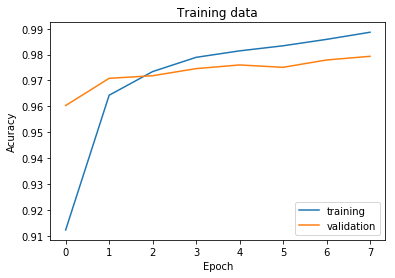

In [15]:
show_TFigure('acc','val_acc',train_data,1)

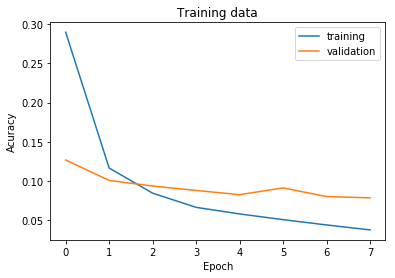

In [16]:
show_TFigure('loss','val_loss',train_data,2)

In [17]:
score = model.evaluate(X_test, Y_test,)
print('Test score:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - ETA: 0s
Test score: 0.0740057071529
Test accuracy: 0.9798


In [18]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


10000/10000 [==============================] - ETA: 0s


In [19]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
def plot_Flabels(X_data,y_data,predict,numtuple):
    figure=plt.gcf()
    figure.set_size_inches(15,15)
    index,number=numtuple
    for j in range(0,number):            
            ax=plt.subplot(3,3,j+1)
            ax.imshow(X_data[index].reshape(28,28),cmap='binary') 
            name='label='+str(y_data[index])
            if len(predict)>0:
                name+=",predict="+str(predict[index])                
            index+=1            
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(name,fontsize=12)            
    plt.show()

In [21]:
X_test[0]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

##### plot_figures_labels(X_test,y_test,predicted_classes,idx=150,num=10)

In [22]:
X_test,y_test

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

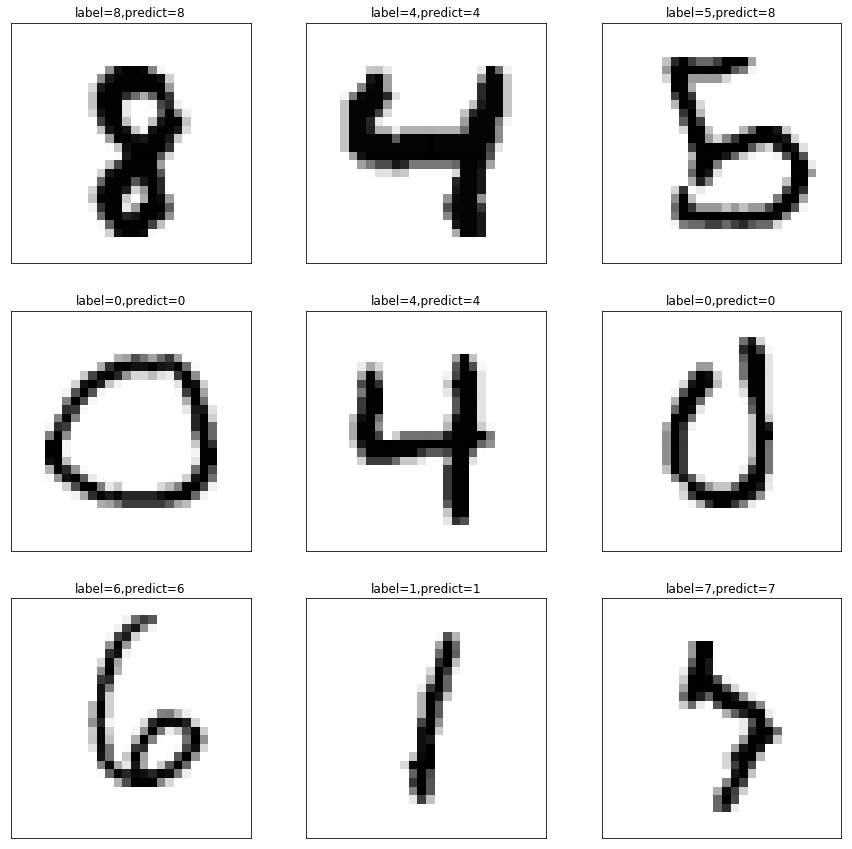

In [27]:
index_tuple=(718,9)
plot_Flabels(X_test,y_test,predicted_classes,index_tuple)

In [24]:
incorrect_indices
    

array([ 115,  149,  247,  259,  321,  445,  447,  448,  495,  582,  610,
        619,  684,  691,  707,  720,  740,  844,  877,  882,  947,  951,
        956,  965, 1003, 1014, 1039, 1112, 1182, 1194, 1226, 1232, 1242,
       1247, 1289, 1319, 1378, 1393, 1425, 1444, 1522, 1527, 1530, 1549,
       1597, 1609, 1681, 1754, 1790, 1868, 1901, 1941, 2004, 2016, 2018,
       2024, 2044, 2053, 2073, 2098, 2109, 2118, 2130, 2135, 2162, 2182,
       2299, 2369, 2371, 2387, 2408, 2422, 2462, 2488, 2573, 2582, 2597,
       2630, 2648, 2654, 2877, 2896, 2939, 2953, 2979, 2995, 3005, 3060,
       3073, 3117, 3289, 3336, 3388, 3405, 3422, 3457, 3475, 3490, 3503,
       3520, 3549, 3558, 3597, 3749, 3776, 3780, 3808, 3853, 3939, 3941,
       3968, 4017, 4065, 4075, 4140, 4163, 4176, 4211, 4224, 4248, 4289,
       4317, 4360, 4382, 4415, 4497, 4536, 4571, 4639, 4671, 4731, 4740,
       4807, 4814, 4823, 4860, 4956, 4966, 5140, 5331, 5457, 5642, 5676,
       5734, 5749, 5842, 5888, 5936, 5937, 5955, 59

In [25]:
train_data.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])